# 1. Importing libraries

In [2]:
# Data manipulation and analysis
import pandas as pd  # Pandas is used for handling structured data (DataFrames, CSVs, etc.)
import numpy as np   # NumPy provides fast numerical operations and array handling

# Visualization
import seaborn as sns  # Seaborn for statistical data visualization (heatmaps, pairplots, etc.)
import os              # OS module for interacting with the file system (paths, directories)
import operator        # Operator module for functional programming (useful in sorting, comparisons, etc.)
import matplotlib.pyplot as plt  # Matplotlib for creating visualizations (plots, charts)

# Machine learning
import tensorflow as tf  # TensorFlow (not directly used here, but often for deep learning models)
from sklearn import datasets  # Sample datasets from scikit-learn
from sklearn.ensemble import RandomForestClassifier  # Random Forest algorithm for classification
from numpy import argmax  # Returns index of max value in an array (useful in predictions)
from sklearn.model_selection import train_test_split  # Splits dataset into training and test sets
from sklearn import metrics  # Metrics for evaluating model performance (accuracy, precision, etc.)
from sklearn.tree import plot_tree  # Visualization function for decision trees inside the Random Forest
from sklearn import tree  # General tree functions (decision tree algorithms, utilities)

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings (to keep the notebook output clean)

# 2. Load the dataset

In [4]:
# Define the file path where project data and outputs are stored.
# The 'r' before the string makes it a "raw string", so backslashes (\) in the path are treated literally and not as escape characters (important on Windows).
# This ensures Python reads the file path correctly.

path = r'C:\Users\Jacques\OneDrive\Documents\Data Analytics course\Data Specialization\Part 2\Exercise 2.3\Datasets'

In [5]:
# Configure pandas display settings so that ALL columns in a DataFrame are shown when printing to the console or Jupyter Notebook.
# By default, pandas may truncate the view if there are too many columns.
# Setting 'display.max_columns' to None removes this limit.

pd.set_option('display.max_columns', None)

In [6]:
# Import the cleaned weather observations dataset from a CSV file.  
# 'os.path.join(path, ...)' safely builds the file path by combining the base path with the file name.  
# 'index_col = False' tells pandas NOT to use any column as the row index, meaning the DataFrame will be given a default integer index (0, 1, 2, ...).  

X = pd.read_csv(os.path.join(path, 'Weather-prediction-dataset.csv'), index_col=False)

In [7]:
# Import the predictions dataset from a CSV file.  
# This file contains the target variable (the "answers") that indicates whether the weather was classified as 'pleasant' or 'unpleasant'.  
# 'os.path.join(path, ...)' combines the base directory path with the file name.  
# 'index_col = False' ensures that no column is treated as the row index, so pandas will assign the default integer index (0, 1, 2, ...).  

answers = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col=False)

In [8]:
# Displays the first 5 rows of the DataFrame 'X'.  
# This is useful for quickly inspecting the structure of the data, confirming that the import worked correctly, and checking column names, data types, and sample values.  

X.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  19600101      1                  7            0.85           1.018   
1  19600102      1                  6            0.84           1.018   
2  19600103      1                  8            0.90           1.018   
3  19600104      1                  3            0.92           1.018   
4  19600105      1                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0              6.5             0.8            10.9                     1   
1              6.1             3.3            10.1                     6   
2              8.5             5.1             9.9                     6   
3              6.3             3.8            10.6                     8   
4              3.0            -0.7             6.0                     8   

   BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
0               0.81             1.0195                       0.88   
1               0.84             1.0172                       0.25   
2               0.77             1.0179                       0.67   
3               0.93             1.0268                       0.25   
4               0.99             1.0286                       0.25   

   BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
0                    0.00                7.0                 3.7   
1                    0.00                0.0                 2.9   
2                    0.00                3.5                 3.1   
3                    0.00                0.0                 2.0   
4                    0.06                0.0                 2.0   

   BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
0               -0.9                7.9                     4   
1                2.2                4.4                     4   
2               -0.5                6.4                     4   
3               -2.0                3.0                     4   
4                0.7                2.8                     4   

   BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
0               0.67              1.017                       0.44   
1               0.67              1.017                       0.18   
2               0.67              1.017                       0.30   
3               0.67              1.017                       0.19   
4               0.67              1.017                       0.19   

   BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
0                    0.01                2.3                 2.4   
1                    0.31                0.0                 2.3   
2                    0.00                0.6                 2.7   
3                    0.00                0.0                 2.0   
4                    0.00                0.0                 2.5   

   BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  DEBILT_humidity  \
0               -0.4                5.1                   7             0.85   
1                1.4                3.1                   8             0.90   
2                1.7                5.3                   6             0.92   
3                0.4                4.4                   8             0.95   
4                1.1                5.3                   6             0.90   

   DEBILT_pressure  DEBILT_global_radiation  DEBILT_precipitation  \
0           1.0032                     0.07                  0.25   
1           1.0056                     0.14 

In [9]:
# Display the dimensions (shape) of the DataFrame 'X'.  
# The output is a tuple: (number of rows, number of columns).  
# - Rows represent individual weather observations.  
# - Columns represent the different features (e.g., station measurements, dates, temperatures, etc.).  
# This helps confirm that the dataset has the expected size before modeling.  

X.shape

(22950, 137)

In [10]:
# Display the first 5 rows of the DataFrame 'answers'.  
# This dataset contains the target variable (whether each day is classified as "pleasant weather" or not).  
# Using .head() gives a quick preview to verify the data structure, column names, and example values.  

answers.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [11]:
# Display the shape (number of rows and columns) of the 'answers' DataFrame.  
# This helps confirm how many records (rows) and features/variables (columns) are in the predictions dataset.  
# Useful for checking consistency with the input features dataset (X).  

answers.shape

(22950, 16)

# 3. Wrangle the data

In [13]:
# Filter the DataFrame X to include only observations from the 2010s decade (2010–2019).  
# 1. X['DATE'].astype(str).str[:4] → extracts the first four characters of the DATE column, which represent the year.  
# 2. >= '2010' & <= '2019' → keeps only rows where the year falls between 2010 and 2019.  
# The resulting DataFrame dfdecade contains only data from this specific decade for further analysis.
dfdecade = X[(X['DATE'].astype(str).str[:4] >= '2010') & (X['DATE'].astype(str).str[:4] <= '2019')]
dfdecade

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18263  20100101      1                  8            0.93          0.9965   
18264  20100102      1                  3            0.74          1.0193   
18265  20100103      1                  3            0.75          1.0226   
18266  20100104      1                  5            0.83          1.0169   
18267  20100105      1                  7            0.78          1.0073   
...         ...    ...                ...             ...             ...   
21910  20191227     12                  8            0.92          1.0273   
21911  20191228     12                  7            0.86          1.0380   
21912  20191229     12                  6            0.93          1.0387   
21913  20191230     12                  1            0.81          1.0354   
21914  20191231     12                  5            0.87          1.0350   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18263                    0.18                 0.56             0.0   
18264                    0.58                 0.00             5.2   
18265                    0.61                 0.00             6.3   
18266                    0.48                 0.00             3.7   
18267                    0.53                 0.04             4.4   
...                       ...                  ...             ...   
21910                    0.15                 0.52             0.1   
21911                    0.35                 0.00             1.3   
21912                    0.61                 0.00             4.9   
21913                    0.64                 0.00             6.5   
21914                    0.58                 0.00             3.5   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
18263              2.9            -0.2             4.8                     6   
18264             -1.5            -4.2             0.4                     8   
18265             -3.2            -6.0             1.1                     7   
18266             -4.9            -8.3            -3.1                     2   
18267             -4.0            -7.1            -1.5                     6   
...                ...             ...             ...                   ...   
21910              6.8             5.6             7.9                     5   
21911              3.7            -0.6             5.7                     8   
21912             -0.8            -2.7             2.6                     8   
21913              0.5            -3.0             5.1                     6   
21914              0.4            -1.3             3.5                     2   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
18263               0.85             0.9912                       0.64   
18264               0.92             0.9995                       0.25   
18265               0.82             1.0156                       0.25   
18266               0.72             1.0211                       0.86   
18267               0.81             1.0111                       0.39   
...                  ...                ...                        ...   
21910               0.68             1.0231                       0.20   
21911               0.68             1.0269                       0.21   
21912               0.68             1.0327                       0.21   
21913               0.68             1.0381                       0.21   
21914               0.68             1.0324                       0.48   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
18263                    2.63                3.2                 9.9   
18264                    0.74                0.0                 3.5   
18265                    0.12                0.0                -0.6   
18266                    0.00                6.4                 0.0   
18267                    1.20      

In [14]:
# Filter the 'answers' DataFrame to include only observations from the 2010s decade (2010–2019).  
# 1. answers['DATE'].astype(str).str[:4] → extracts the year from the DATE column as the first four characters.  
# 2. >= '2010' & <= '2019' → keeps only rows where the year is between 2010 and 2019.  
# The resulting DataFrame 'answers_decade' contains only data from this specific decade for further analysis.
answers_decade = answers[(answers['DATE'].astype(str).str[:4] >= '2010') & (answers['DATE'].astype(str).str[:4] <= '2019')]
answers_decade

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263  20100101                       0                          0   
18264  20100102                       0                          0   
18265  20100103                       0                          0   
18266  20100104                       0                          0   
18267  20100105                       0                          0   
...         ...                     ...                        ...   
21910  20191227                       0                          0   
21911  20191228                       0                          0   
21912  20191229                       0                          0   
21913  20191230                       0                          0   
21914  20191231                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   
18264                          0                        0   
18265                          0                        0   
18266                          0                        0   
18267                          0                        0   
...                          ...                      ...   
21910                          0                        0   
21911                          0                        0   
21912                          0                        0   
21913                          0                        0   
21914                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   
18264                            0                          0   
18265                            0                          0   
18266                            0                          0   
18267                            0                          0   
...                            ...                        ...   
21910                            0                          0   
21911                            0                          0   
21912                            0                          0   
21913                            0                          0   
21914                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   
18264                        0                           0   
18265                        0                           0   
18266                        0                           0   
18267                        0                           0   
...                        ...                         ...   
21910                        0                           0   
21911                        0                           0   
21912                        0                           0   
21913                        0                           0   
21914                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   
18264                            0                        0   
18265                            0                        0   
18266                            0                        0   
18267                            0                        0   
...                            ...                      ...   
21910                            0                        0   
21911                            0                        0   
21912                            0                        0   
21913                            0                        0   
21914                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   
18264                          0    

In [15]:
# Configure pandas to display all rows of a DataFrame when printing, instead of truncating with ellipses (...).
pd.set_option('display.max_rows', None)

In [16]:
# Create a list of unique weather station names by extracting the part of each column name before the underscore ('_').  
# Only columns containing an underscore are considered, since those represent station-specific measurements (e.g., 'BASEL_temp_mean' → 'BASEL').
stations = [col.split('_')[0] for col in dfdecade.columns if '_' in col]

In [17]:
# Convert the list of station names into a set to obtain only the unique station names, removing any duplicates.
unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [18]:
# Calculate and display the total number of non-missing entries for each weather station in dfdecade.
# 1. Initialize an empty dictionary 'station_frequencies' to store counts per station.
# 2. Loop over each unique station:
#    a. Identify all columns that belong to the current station (columns starting with the station name).
#    b. Count the number of non-missing (non-NaN) values across all these columns and sum them to get a total count for the station.
#    c. Store this total count in the dictionary with the station name as the key.
# 3. Print the frequency of entries for each station to understand data completeness and coverage.
station_frequencies = {}

for station in unique_stations:
    # Select columns that belong to the current station
    station_columns = [col for col in dfdecade.columns if col.startswith(station)]
    
    # Count non-missing entries across all columns for the station
    station_frequencies[station] = dfdecade[station_columns].notna().sum().sum()

# Print the frequency of entries for each station
print("Frequency of entries for each weather station:")
for station, freq in station_frequencies.items():
    print(f"{station}: {freq} entries")

Frequency of entries for each weather station:
OSLO: 32868 entries
STOCKHOLM: 32868 entries
LJUBLJANA: 32868 entries
BELGRADE: 32868 entries
MUNCHENB: 32868 entries
BUDAPEST: 32868 entries
HEATHROW: 32868 entries
MAASTRICHT: 32868 entries
KASSEL: 32868 entries
SONNBLICK: 32868 entries
DUSSELDORF: 32868 entries
DEBILT: 32868 entries
MADRID: 32868 entries
VALENTIA: 32868 entries
BASEL: 32868 entries


In [19]:
# Remove columns that are no longer needed for analysis ('DATE' and 'MONTH') from dfdecade.  
# axis=1 specifies that columns (not rows) are being dropped.  
# inplace=True ensures the changes are applied directly to dfdecade without creating a new DataFrame.
dfdecade.drop(['DATE', 'MONTH'], axis=1, inplace=True)

In [20]:
# Check the dimensions (rows, columns) of dfdecade to confirm that the filtered observations dataset contains the expected number of rows and variables after restricting to the 2010s.
dfdecade.shape

(3652, 135)

In [21]:
# Remove the 'DATE' column from the answers_decade DataFrame, as it's no longer needed for analysis.
answers_decade.drop(columns='DATE', inplace=True)

In [22]:
# Check the dimensions (rows, columns) of answers_decade to confirm that the filtered predictions dataset has the expected shape after dropping the DATE column and restricting to the 2010s.
answers_decade.shape

(3652, 15)

# 4. Reshaping the dataframes for modelling

In [24]:
# Reassign the filtered 2010s observations dataset (dfdecade) back to X, so X now only contains data from this decade.
X = dfdecade

In [25]:
# Assign the filtered predictions dataset (answers_decade) to y, so y now contains only the target values for the 2010s.
y = answers_decade

In [26]:
# Convert the DataFrames X (features) and y (targets) into NumPy arrays, which are the required input format for many machine learning models.
X = np.array(X)
y = np.array(y)

In [27]:
# Display the dimensions (rows, columns) of X to verify the size of the feature array after conversion to NumPy.
X.shape

(3652, 135)

In [28]:
# Display the dimensions of y to verify the size of the target array after conversion to NumPy.
y.shape

(3652, 15)

# 5. Splitting the data

In [30]:
# Split the feature array X and target array y into training and testing sets.  
# By default, train_test_split uses a 75/25 split. random_state=42 ensures reproducibility of the split across runs.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
# Display the dimensions of the training and testing sets to verify that the data was split correctly.
# X_train, y_train → feature and target arrays for training the model.
# X_test, y_test → feature and target arrays for evaluating the model.
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


# 6. Random forest model

In [33]:
# Initialize a Random Forest classifier with 100 trees (n_estimators=100).  
# The optional max_depth parameter is commented out; if used, it would limit the depth of each tree.  

# Train the Random Forest model on the training data.
# The fit() method takes X_train (features) and y_train (targets) and builds the ensemble of decision trees.
clf = RandomForestClassifier(n_estimators=100)  # , max_depth=5
clf.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
# Use the trained Random Forest model to make predictions on the test features X_test.
y_pred = clf.predict(X_test)

# Calculate and display the model's accuracy by comparing the predicted values (y_pred) with the actual target values (y_test) using accuracy_score from sklearn.metrics.
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5859802847754655


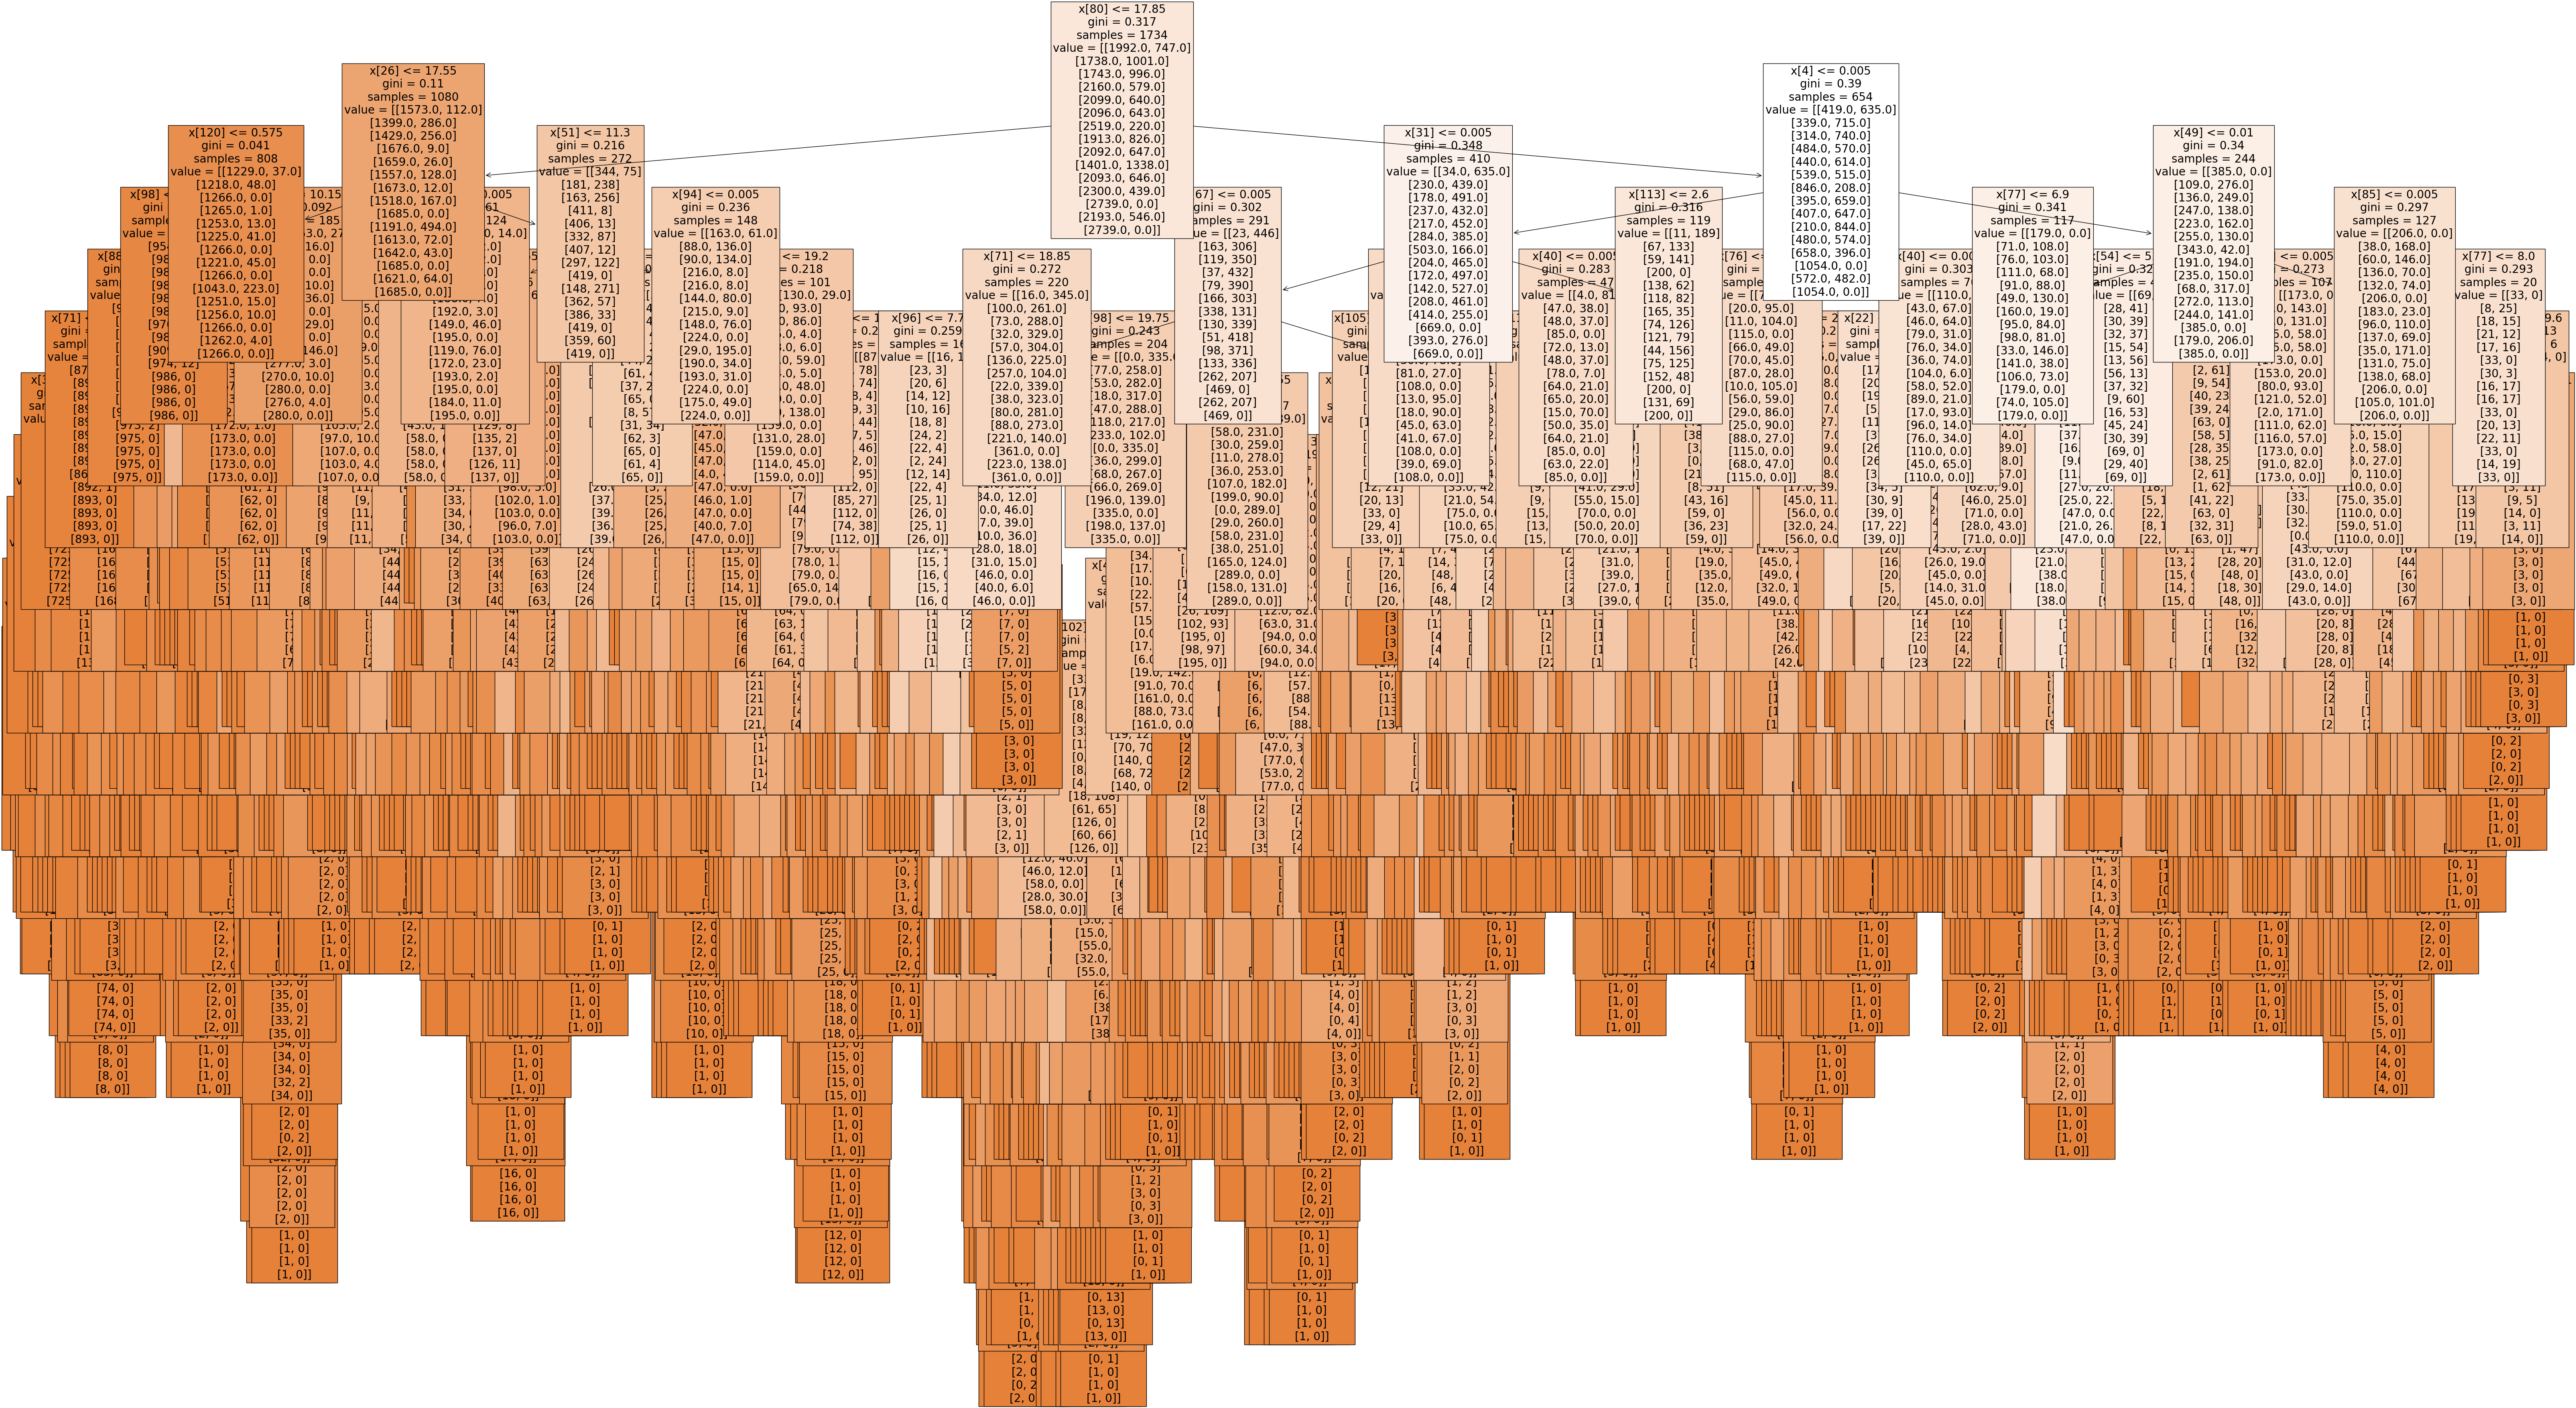

In [35]:
# Visualize one decision tree from the trained Random Forest ensemble.
# clf.estimators_[15] selects the 16th tree (index 15) in the forest.
# figsize sets the size of the figure for better readability.
# fontsize=20 makes the text on the nodes larger.
# filled=True colors the nodes based on the predicted class to make interpretation easier.
# The comment above indicates the mapping of class labels for reference:
# 0 = 'Unpleasant Weather', 1 = 'Pleasant Weather'.
fig = plt.figure(figsize=(80, 40))
plot_tree(clf.estimators_[15], fontsize=20, filled=True);

In [36]:
# Define the path to the folder where the figure will be saved.
# This combines the main path with a subfolder named 'Visualizations'.
save_folder = os.path.join(path, 'Visualizations')

# Create the 'Visualizations' folder if it does not already exist.
# exist_ok=True prevents an error if the folder already exists.
os.makedirs(save_folder, exist_ok=True)

# Save the current figure (decision tree visualization) as a PNG file in the 'Visualizations' folder.
# bbox_inches='tight' ensures all parts of the figure are included without extra whitespace.
fig.savefig(os.path.join(save_folder, 'random_forest_2010s.png'), bbox_inches='tight')

# 7. Uncovering of feature importances

In [38]:
# Retrieve the feature importances calculated by the trained Random Forest model.
# feature_importances_ is an array indicating the relative importance of each feature in making predictions.

newarray = clf.feature_importances_  # Store the importances in a variable
print(clf.feature_importances_.shape)  # Print the shape of the array to confirm it matches the number of features
newarray  # Display the array of feature importances

(135,)


array([4.08302628e-03, 4.37676332e-03, 3.30881725e-03, 3.01100025e-03,
       1.67734556e-02, 1.15302401e-02, 1.59921175e-02, 6.06371301e-03,
       2.30655773e-02, 3.50924284e-03, 3.19467887e-03, 4.07830709e-03,
       2.94649371e-03, 1.59863573e-02, 3.23641522e-03, 5.88665695e-03,
       3.87437300e-03, 9.18679595e-03, 3.09462205e-04, 0.00000000e+00,
       0.00000000e+00, 1.51749560e-03, 1.37692259e-02, 1.26319165e-03,
       1.42942189e-02, 1.09097119e-02, 2.53344020e-02, 1.94492558e-03,
       3.21199295e-03, 4.34690223e-03, 4.27013942e-03, 1.68306184e-02,
       5.43686638e-03, 1.96085573e-02, 3.00252881e-03, 2.40604172e-02,
       3.00148202e-03, 3.06643268e-03, 4.92315438e-03, 3.69595865e-03,
       1.97589199e-02, 8.22608741e-03, 2.39771921e-02, 4.94448014e-03,
       3.06557309e-02, 2.65648409e-03, 4.28677070e-03, 3.48730054e-03,
       4.00206526e-03, 1.06174817e-02, 4.07581630e-03, 1.59248455e-02,
       2.83150200e-03, 2.37817963e-02, 3.97102436e-03, 2.76151605e-03,
      

In [39]:
# Reshape the feature importances array for further analysis or visualization.
# The new shape (-1, 15, 9) organizes the data into 3 dimensions:
#   - '-1' lets NumPy automatically determine the first dimension based on the total size,
#   - 15 and 9 likely correspond to the number of stations and features per station (or another logical grouping).
# This makes it easier to analyze or plot feature importances per station and feature type.

newarray = newarray.reshape(-1, 15, 9)
print(newarray.shape)  # Print the new shape to confirm reshaping
newarray  # Display the reshaped array

(1, 15, 9)


array([[[4.08302628e-03, 4.37676332e-03, 3.30881725e-03, 3.01100025e-03,
         1.67734556e-02, 1.15302401e-02, 1.59921175e-02, 6.06371301e-03,
         2.30655773e-02],
        [3.50924284e-03, 3.19467887e-03, 4.07830709e-03, 2.94649371e-03,
         1.59863573e-02, 3.23641522e-03, 5.88665695e-03, 3.87437300e-03,
         9.18679595e-03],
        [3.09462205e-04, 0.00000000e+00, 0.00000000e+00, 1.51749560e-03,
         1.37692259e-02, 1.26319165e-03, 1.42942189e-02, 1.09097119e-02,
         2.53344020e-02],
        [1.94492558e-03, 3.21199295e-03, 4.34690223e-03, 4.27013942e-03,
         1.68306184e-02, 5.43686638e-03, 1.96085573e-02, 3.00252881e-03,
         2.40604172e-02],
        [3.00148202e-03, 3.06643268e-03, 4.92315438e-03, 3.69595865e-03,
         1.97589199e-02, 8.22608741e-03, 2.39771921e-02, 4.94448014e-03,
         3.06557309e-02],
        [2.65648409e-03, 4.28677070e-03, 3.48730054e-03, 4.00206526e-03,
         1.06174817e-02, 4.07581630e-03, 1.59248455e-02, 2.83150200

In [40]:
# Collapse this shape into one observation for each weather station

# newarray[0] selects the first "slice" along the first dimension of newarray.
#   - If newarray has shape (a, b, c), then newarray[0] has shape (b, c).
#   - In your earlier reshape attempt, this likely corresponds to feature importances for all features of all stations in one grouping.

# np.sum(..., axis=1) sums across the second dimension (columns).
#   - If newarray[0] has shape (15, 9), summing along axis=1 collapses the 9 features per station into a single value (the sum of importances).
#   - The result is an array of shape (15,), where each value represents the total importance for one weather station.

sumarray = np.sum(newarray[0], axis=1)

# Display the result: a 1D array with one importance score per station
sumarray

array([0.08820471, 0.05189932, 0.06739771, 0.08271295, 0.10224944,
       0.07166406, 0.03059319, 0.0899681 , 0.10130602, 0.070965  ,
       0.08775111, 0.05770945, 0.03595757, 0.05765945, 0.00396192])

In [41]:
# Convert the set of unique stations to a list

# unique_stations is assumed to be a Python set containing station identifiers (e.g., station IDs, names, or codes). Sets are useful for storing unique values
# But they are unordered and do not support indexing.

# Wrapping the set in list() converts it into a list:
#   - This allows ordering, indexing, slicing, and other list operations.
#   - The order of elements in the resulting list will depend on how Python internally stored the set (not guaranteed to match the original order).

unique_stations_list = list(unique_stations)

In [42]:
# Create a Pandas Series to map feature importance scores to station names

# 'sumarray' contains the aggregated importance scores (e.g., summed per station).
# 'unique_stations_list' provides labels (station IDs/names) for each score.

important = pd.Series(sumarray, index=unique_stations_list)

# Sort the importance scores in descending order so that the most important stations appear at the top.
important = important.sort_values(ascending=False)

# Display the sorted Series to review which stations had the highest feature importance in the Random Forest model.
important

MUNCHENB      0.102249
KASSEL        0.101306
MAASTRICHT    0.089968
OSLO          0.088205
DUSSELDORF    0.087751
BELGRADE      0.082713
BUDAPEST      0.071664
SONNBLICK     0.070965
LJUBLJANA     0.067398
DEBILT        0.057709
VALENTIA      0.057659
STOCKHOLM     0.051899
MADRID        0.035958
HEATHROW      0.030593
BASEL         0.003962
dtype: float64

In [43]:
# Create a DataFrame that links each weather station to its feature importance score

# 'Weather Station' column comes from unique_stations_list (station names/IDs).
# 'Importance' column comes from sumarray (aggregated feature importance values per station).
df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

# Sort the DataFrame in descending order by importance so that the most influential stations in the model appear first.
df_importance = df_importance.sort_values(by='Importance', ascending=False)

['OSLO', 'STOCKHOLM', 'LJUBLJANA', 'BELGRADE', 'MUNCHENB', 'BUDAPEST', 'HEATHROW', 'MAASTRICHT', 'KASSEL', 'SONNBLICK', 'DUSSELDORF', 'DEBILT', 'MADRID', 'VALENTIA', 'BASEL']


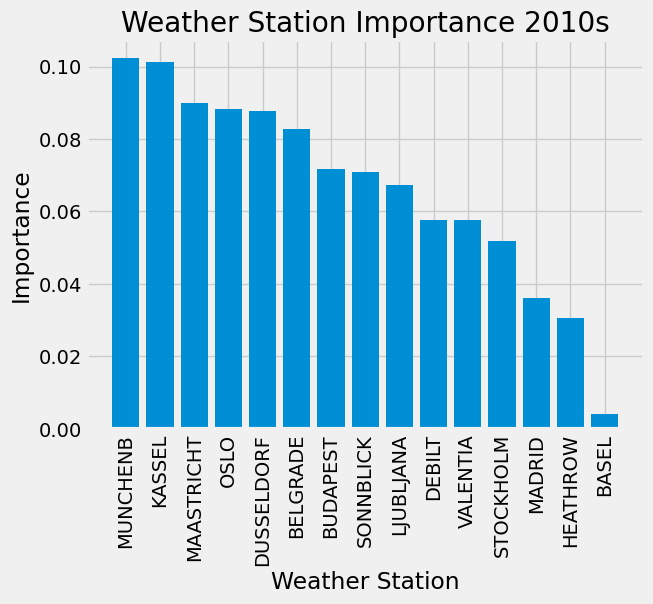

In [45]:
# Plot the feature importance of each weather station

%matplotlib inline   
# Ensures plots are displayed directly in the notebook.

plt.style.use('fivethirtyeight')  # Apply a clean and professional-looking style.
print(unique_stations_list)       # Print the station names for reference/debugging.

# Create a vertical bar chart with stations on the x-axis and importance scores on the y-axis.
plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation='vertical')

# Rotate station labels to prevent overlap and improve readability.
plt.xticks(rotation='vertical')

# Label the axes and add a descriptive title to the chart.
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s')

# Save the plot as a PNG file in the '04 Visualizations' folder, using bbox_inches='tight' to prevent labels from being cut off.
plt.savefig(os.path.join(path, 'Visualizations', '2010s_feauture_importances.png'), bbox_inches='tight')

# Display the final plot in the notebook.
plt.show()